In [1]:
import pandas as pd                               # panda
import pandas_datareader as pdr                   # Baixar dados yahoo

import matplotlib.pyplot as plt                   # grafico
import matplotlib.dates as mdates                 # trabalhar datas

#!pip install --upgrade mplfinance
from mpl_finance import candlestick_ohlc          # candlestick

import statsmodels.api as sm                      # regressao
from statsmodels.api import add_constant          # para a regressao considerar o intercepto

import numpy as np
import scipy.stats

from statsmodels.tsa.stattools import coint       # Funcao Coint ()
from statsmodels.tsa.stattools import adfuller



C:\Users\paiva\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\paiva\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


### DECLARACAO DE FUNCOES ###

In [27]:
def baixar_yahoo(tickers,inicio,fim):

    db = pd.DataFrame()
    # Percorre a lista tickers, lendo o yahoo e salvando no DataFrame db
    #for i in tickers:
    #    cot = pdr.DataReader(i, 'yahoo', inicio,fim)
    #    cot['Ativo']=i
    #    db = pd.concat([db,cot],sort=True)  

    #db.to_csv('Ativos.csv')
    db = pd.read_csv('Ativos.csv',parse_dates=[0], infer_datetime_format = True)
 
    db = db[['Ativo','Date','Open','High','Low','Adj Close']].rename(columns={'Adj Close': 'Close'})
    
    # Modo Debug
    if (Debug==True): print(db)
    
    return db

In [23]:
def candlestick(tmp,tickers,tamanho):

    tmp["Date"] = tmp["Date"].apply(mdates.date2num)
    for i in tickers:
        tmp1 = tmp.loc[tmp["Ativo"]==i];  
        
        f1, ax =plt.subplots(figsize = (20,8))
        candlestick_ohlc(ax, tmp1[['Date','Open','High','Low','Close']].tail(tamanho).values, width=.7, colorup='g', colordown='r')
        ax.xaxis_date()
        ax.grid(True)

        ax.set_axisbelow(True)
        ax.set_title(i, color='white')
        ax.set_facecolor('white')
        ax.figure.set_facecolor('gray')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')

        plt.show()

def grafico_residuo(df,tickers,periodo,reg):
        
    plt.figure(figsize=(20,4))
    ax = df.plot(color='g', grid=True, label=reg)
    plt.axhline(df.mean(), color='red')
    plt.axhline(df.mean()+2*df.std(), color='blue')
    plt.axhline(df.mean()-2*df.std(), color='blue')

    ax.xaxis_date()  # formata o timestamp para o formato data
    ax.set_axisbelow(True)
    ax.set_title('Residuos entre %s e %s em %i periodos' %(tickers[0],tickers[1],periodo), color='black')
    ax.set_facecolor('white')
    ax.figure.set_facecolor('white')

    plt.legend()
    plt.show()    
        

In [28]:
## FUNCOES DE TESTES DE COINTEGRACAO E DE ESTACIONARIEDADE

#!pip install arch
from arch.unitroot import PhillipsPerron
from arch.unitroot import ADF

def cointegracao(serie1, serie2):
    
    # Funcao Principal
    score, pvalue, _ = coint(serie1, serie2)
    
    ##### MODO DEBUG #####
    if pvalue< 0.05:     print("pvalue=%f => COINTEGRADO" %(pvalue))
    else:                print("pvalue=%f => NÃO " %(pvalue))
    ##### FIM MODO DEBUG #####

    return score, pvalue

# ADF da Statsmodel -
def adftest(df,ativo):

    # Funcao Principal
    adfstat, pvalue, usedlag, nobs, crit_values = adfuller(df, maxlag=1, autolag=None)
    if adfstat < crit_values['1%']:    adf='99%'
    elif adfstat < crit_values['5%']:  adf='95%'
    elif adfstat < crit_values['10%']: adf='90%'
    else:                              adf='0%'
            
    ##### MODO DEBUG #####
    if (Debug==True):
        print("Dick-Fuller da serie:",ativo)
        print("- ADF:",adfstat)
        print("- P-VALOR:",pvalue)
        print('- CV para 99%',crit_values['1%'])
        print('- CV para 95%',crit_values['5%'])
        print('- CV para 90%',crit_values['10%'])

        if adfstat < crit_values['1%']:     print("Nivel de Confiança: 99%")
        elif adfstat < crit_values['5%']:   print("Nivel de Confiança: 95%")
        elif adfstat < crit_values['10%']:  print("Nivel de Confiança: 90%")
        else:                               print("Nivel de Confiança: Menor que 90%")
    ##### FIM MODO DEBUG #####
        
    return adfstat, adf, pvalue;      


# Phillips Perron da lib Arch
def PP_arch(default):
    
    # Funcao Principal
    pp = PhillipsPerron(default)
    pp.lags = 1
    print('pp', pp)  # se nao printar esse pp, ele nao preenche as variaveis _stat, _critical_values e _pvalue
    
    if   (pp._stat < pp._critical_values['1%']):  clevel = '99%'
    elif (pp.stat < pp._critical_values['5%']):   clevel = '95%'
    elif (pp.stat < pp._critical_values['10%']):  clevel = '90%'
    else:                                         clevel = '0%'
 
    ##### MODO DEBUG #####
    if (Debug==True): print(pp.summary().as_text())
    ##### FIM MODO DEBUG #####    
        
    return pp._stat, pp._pvalue, clevel

### INICIO ###

C:\Users\paiva\anaconda3\lib\site-packages\arch\unitroot\unitroot.py:631: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


pp      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.906
P-value                         0.045
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
pp      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.492
P-value                         0.008
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
pp      Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.621
P-value                         0.089
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.49 (1%), -2.89 (5%), -2.58

pp      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.507
P-value                         0.008
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
pp      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.707
P-value                         0.004
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
pp      Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.733
P-value                         0.004
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57

120


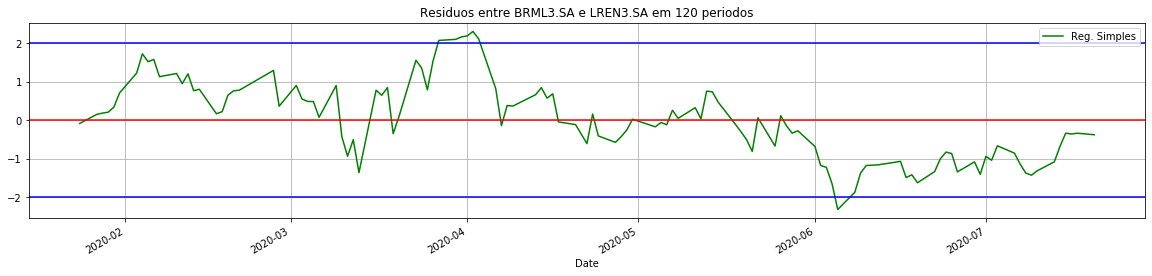

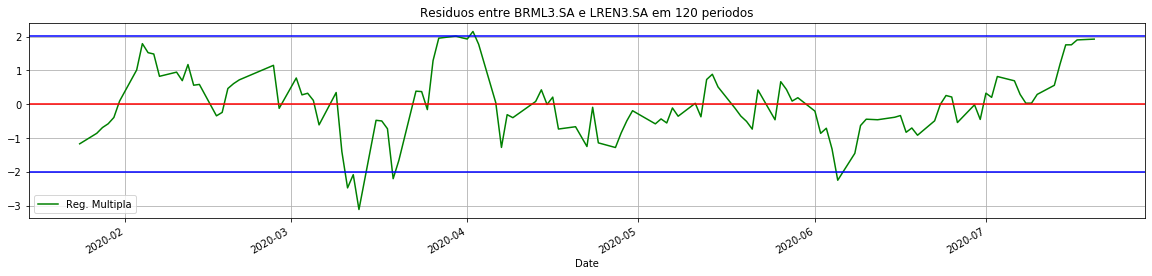

            residuo_simples  residuo_multipla  zscore_simples  zscore_multipla
Date                                                                          
2020-01-24        -0.087414         -0.710418       -0.088171        -1.173043
2020-01-27         0.146750         -0.521936        0.148022        -0.861821
2020-01-28         0.179625         -0.419092        0.181183        -0.692005
2020-01-29         0.202977         -0.351349        0.204737        -0.580147
2020-01-30         0.334245         -0.238518        0.337143        -0.393841
...                     ...               ...             ...              ...
2020-07-14        -0.674698          0.716730       -0.680548         1.183465
2020-07-15        -0.336017          1.062833       -0.338930         1.754950
2020-07-16        -0.359207          1.063430       -0.362321         1.755935
2020-07-17        -0.337583          1.151162       -0.340510         1.900798
2020-07-20        -0.377706          1.165295       

In [30]:
Debug=False

tickers = ['BRML3.SA', 'LREN3.SA'];

# Busca cotacoes no Yahoo Finance
df = baixar_yahoo(tickers, '2019-1-1','2020-7-20')

# Cria Tabela com os fechamentos dos dois ativos [DATA, Close1, Close2]
esquerda = df[df['Ativo']==tickers[0]].set_index('Date')['Close']
direita = df[df['Ativo']==tickers[1]].set_index('Date')['Close']
par = pd.merge(left=esquerda, right=direita, left_on='Date', right_on='Date').rename(columns={'Close_x': tickers[0], 'Close_y': tickers[1]})
if (Debug==True): print(par)

# Cria o cubo de periodos
cubo = pd.DataFrame(columns=['Periodo','Cointegrado','Coint_score','Coint_pvalue','Correlacao',
                             'RegS_Beta','RegS_r2','RegM_Beta','RegM_r2',
                             'ADF_stat_RegS','ADF_clevel_RegS','ADF_pvalue_RegS','ADF_stat_RegM','ADF_clevel_RegM','ADF_pvalue_RegM',
                             'PP_stat_RegS','PP_clevel_RegS','PP_pvalue_RegS','PP_stat_RegM','PP_clevel_RegM','PP_pvalue_RegM'])

# Popula o cubo de periodos
for i in range(100,260,10):
    # Adiciona o PERIODO analisado no dataframe
    cubo = cubo.append({'Periodo': int(i)}, ignore_index=True)

    # Testa a COINTEGRACAO entre os ativos
    score, pvalue, _ = coint(par[tickers[0]].tail(i),par[tickers[1]].tail(i))
    if (pvalue < 0.05): 
        cubo.loc[cubo['Periodo']==i, 'Cointegrado']='Sim'
        cubo.loc[cubo['Periodo']==i, 'Coint_score']=score
        cubo.loc[cubo['Periodo']==i, 'Coint_pvalue']=pvalue
    else:               
        cubo.loc[cubo['Periodo']==i, 'Cointegrado']='-'
        cubo.loc[cubo['Periodo']==i, 'Coint_score']=score
        cubo.loc[cubo['Periodo']==i, 'Coint_pvalue']=pvalue

        
    # Gera a CORRELACAO entre os ativos
    correl = np.corrcoef(par[tickers[0]].tail(i),par[tickers[1]].tail(i))[1,0]
    cubo.loc[cubo['Periodo']==i, 'Correlacao']=correl

    
    # Gera a REGRESSAO SIMPLES entre os ativos e popula o cubo com Coef angular e r2
    X = pd.DataFrame()
    X = sm.add_constant(par[tickers[1]].tail(i))   # Precisa adicionar o add_contant no X para que a OLS retorne o intercept
    model = sm.OLS(par[tickers[0]].tail(i),X)
    results = model.fit()
    cubo.loc[cubo['Periodo']==i, 'RegS_Beta']=results.params[1]   
    cubo.loc[cubo['Periodo']==i, 'RegS_r2']=results.rsquared    

    
    # Gera a REGRESSAO MULTIPLA entre os ativos e popula o cubo com Coef angular e r2
    X = pd.DataFrame()
    X = np.column_stack((par[tickers[1]].tail(i), range(1,i+1,1)))
    X = sm.add_constant(X, prepend=True)
    model_multipla = sm.OLS(par[tickers[0]].tail(i),X)
    results_multipla = model_multipla.fit()
    cubo.loc[cubo['Periodo']==i, 'RegM_Beta']=results_multipla.params[1]   
    cubo.loc[cubo['Periodo']==i, 'RegM_r2']=results_multipla.rsquared    

    # Cria um Dataframe temporario com os residuos das regressoes de cada periodo (para o ADF e PP)
    tmp = pd.DataFrame()
    tmp['residuo_simples']  = par[tickers[0]].tail(i)-results.predict()
    tmp['residuo_multipla'] = par[tickers[0]].tail(i)-results_multipla.predict()
    tmp['zscore_simples']   = (tmp['residuo_simples'] - np.mean(tmp['residuo_simples']))/np.std(tmp['residuo_simples']);
    tmp['zscore_multipla']   = (tmp['residuo_multipla'] - np.mean(tmp['residuo_multipla']))/np.std(tmp['residuo_multipla']);
    
    # Teste de Estacionariedade dos Resíduos (ADF)
    adfstat,adf,pvalue = adftest(tmp['residuo_simples'], "Residuo Simples")
    cubo.loc[cubo['Periodo']==i, 'ADF_stat_RegS']=adfstat
    cubo.loc[cubo['Periodo']==i, 'ADF_pvalue_RegS']=pvalue
    cubo.loc[cubo['Periodo']==i, 'ADF_clevel_RegS']=adf 

    adfstat,adf,pvalue = adftest(tmp['residuo_multipla'], "Residuo Simples")
    cubo.loc[cubo['Periodo']==i, 'ADF_stat_RegM']=adfstat
    cubo.loc[cubo['Periodo']==i, 'ADF_pvalue_RegM']=pvalue
    cubo.loc[cubo['Periodo']==i, 'ADF_clevel_RegM']=adf 

    # Teste de Estacionariedade dos Resíduos (PP)
    _stat, _pvalue, clevel = PP_arch(tmp['residuo_simples'])
    cubo.loc[cubo['Periodo']==i, 'PP_stat_RegS'] = _stat
    cubo.loc[cubo['Periodo']==i, 'PP_pvalue_RegS'] = _pvalue
    cubo.loc[cubo['Periodo']==i, 'PP_clevel_RegS'] = clevel
        
    _stat, _pvalue, clevel = PP_arch(tmp['residuo_multipla'])
    cubo.loc[cubo['Periodo']==i, 'PP_stat_RegM'] = _stat
    cubo.loc[cubo['Periodo']==i, 'PP_pvalue_RegM'] = _pvalue
    cubo.loc[cubo['Periodo']==i, 'PP_clevel_RegM'] = clevel
         
        
if (Debug==True): print(par)
    
print(cubo)
print() 
print("Desvio Medio do Beta (reg. simples): ", cubo['RegS_Beta'].std()/cubo['RegS_Beta'].mean())
print("Desvio Medio do Beta (reg. multipla): ", cubo['RegM_Beta'].std()/cubo['RegM_Beta'].mean())
print()


# Gera os graficos do Desvio para o periodo selecionado
periodo = 0;
while (periodo != 99): 
    print("Selecione um periodo, ou digite 1 para ver o Cubo, ou 99 para sair")
    
    periodo = input()
    if (int(periodo)==99): break
    elif (int(periodo)==1): 
        print(cubo)
        print()
    else:
        
        X = pd.DataFrame()
        X = sm.add_constant(par[tickers[1]].tail(int(periodo)))  
        results = sm.OLS(par[tickers[0]].tail(int(periodo)),X).fit()

        X = pd.DataFrame()
        X = np.column_stack((par[tickers[1]].tail(int(periodo)), range(1,int(periodo)+1,1)))
        X = sm.add_constant(X, prepend=True)
        results_multipla = sm.OLS(par[tickers[0]].tail(int(periodo)),X).fit()
        
        tmp = pd.DataFrame()
        tmp['residuo_simples']  = par[tickers[0]].tail(int(periodo))-results.predict()
        tmp['residuo_multipla'] = par[tickers[0]].tail(int(periodo))-results_multipla.predict()
        tmp['zscore_simples']   = (tmp['residuo_simples'] - np.mean(tmp['residuo_simples']))/np.std(tmp['residuo_simples']);
        tmp['zscore_multipla']   = (tmp['residuo_multipla'] - np.mean(tmp['residuo_multipla']))/np.std(tmp['residuo_multipla']);
        #tmp['zscore_simples1'] = scipy.stats.zscore(tmp['residuo_simples']) # Validando z-score - (deu certo)

        grafico_residuo(tmp['zscore_simples'],tickers,int(periodo),'Reg. Simples')
        grafico_residuo(tmp['zscore_multipla'],tickers,int(periodo),'Reg. Multipla')
       
        
        print(tmp) 
        
else: 
    print("Finalizado")


In [ ]:
*

+